In [ ]:
''' Rowan Mascarenhas - ID: 1797865 - 2/29/24 -
    Final Assignment - 08'''

In [1]:
# Problem 1: Kids Game

import random
def kids_game(n):

    # Keep track of correct answers vs all answers
    right_answers = 0
    all_answers = 0

    # Loop n times
    for i in range(n):
        # Create 2 random intergers for division problem
        divisor = random.randint(1, 9)
        dividend = random.randint(9, 1000)

        # Calculate correct answers
        correct_quotient = dividend // divisor
        correct_remainder = dividend % divisor

        # Print question
        print("Given: ",dividend, "/", divisor)

        # Allow user to input an answer
        user_quotient = int(input("Enter the quotient: "))
        user_remainder = int(input("Enter the remainder: "))

        # If user answers match correct answers, give the user points
        if (user_quotient == correct_quotient) and (user_remainder == correct_remainder):
            print("Answer is correct.")
            right_answers += 1
            all_answers += 1
        else:
            print("Answer is incorrect.")
            all_answers += 1

    # Print result
    print("You got {} correct answers out of {}.".format(right_answers,all_answers))

kids_game(1)


Given  341 / 7
Enter the quotient: 3
Enter the remainder: 4
Answer is incorrect.
You got 0 correct answers out of 1.


In [2]:
# Problem 2a: 2D space

# Define the function f(x) using a lambda function
f_x = lambda x: x**2 + 3*x - 7

# Define the function g(a, b) to find the slope between two points
def g(a, b):
    # Slope formula: f(b)-f(a) / b-a
    slope = (f_x(b) - f_x(a)) / (b - a)
    return slope

# Find the slope between x(a) = 5 and 13
slope1 = g(5, 13)
print("Slope between x @ a = 5 and x @ b = 13:", slope1)

# Find the slope between x = -4 and 6
slope2 = g(-4, 6)
print("Slope between x @ a = -4 and x @ b = 6:", slope2)


Slope between x @ a = 5 and x @ b = 13: 21.0
Slope between x @ a = -4 and x @ b = 6: 5.0


In [4]:
# Problem 2b: 2D space
# Note: Load 2a first

# For square root function
import math

# Define the info(a, b) function to calculate slope, midpoint, and length
def info():
    a = int(input("Enter a value for a: "))
    b = int(input("Enter a value for b: "))

    # Same as 2a, make sure to run 2a first
    slope = g(a, b)

    # Calculate midpoint and euclidean distance
    midpoint = ((a + b) / 2, f_x((a) + f_x(b)) / 2)
    eu_distance = math.sqrt((b - a)**2 + (f_x(b) - f_x(a))**2)

    # Return slope, midpoint, eu_distance
    print("\nSlope: ", slope,"\nMidpoint: ", midpoint,"\nEuclidean distance: ", eu_distance, "\n")
    return slope, midpoint, eu_distance
info()



Enter a value for a: 3
Enter a value for b: 4

Slope:  10.0 
Midpoint:  (3.5, 320.5) 
Euclidean distance:  10.04987562112089 



(10.0, (3.5, 320.5), 10.04987562112089)

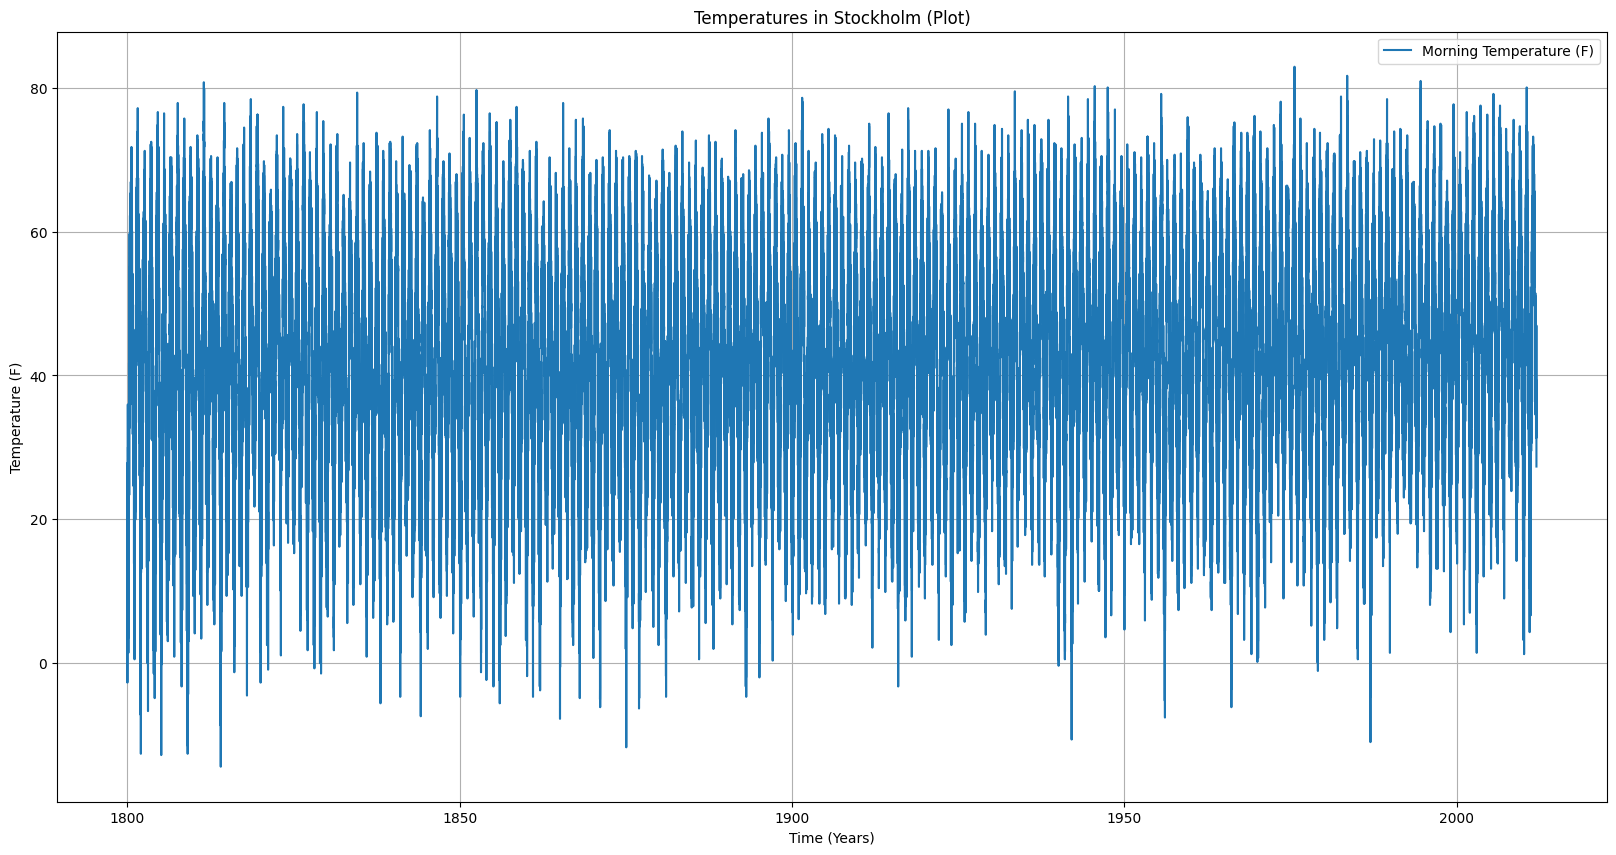

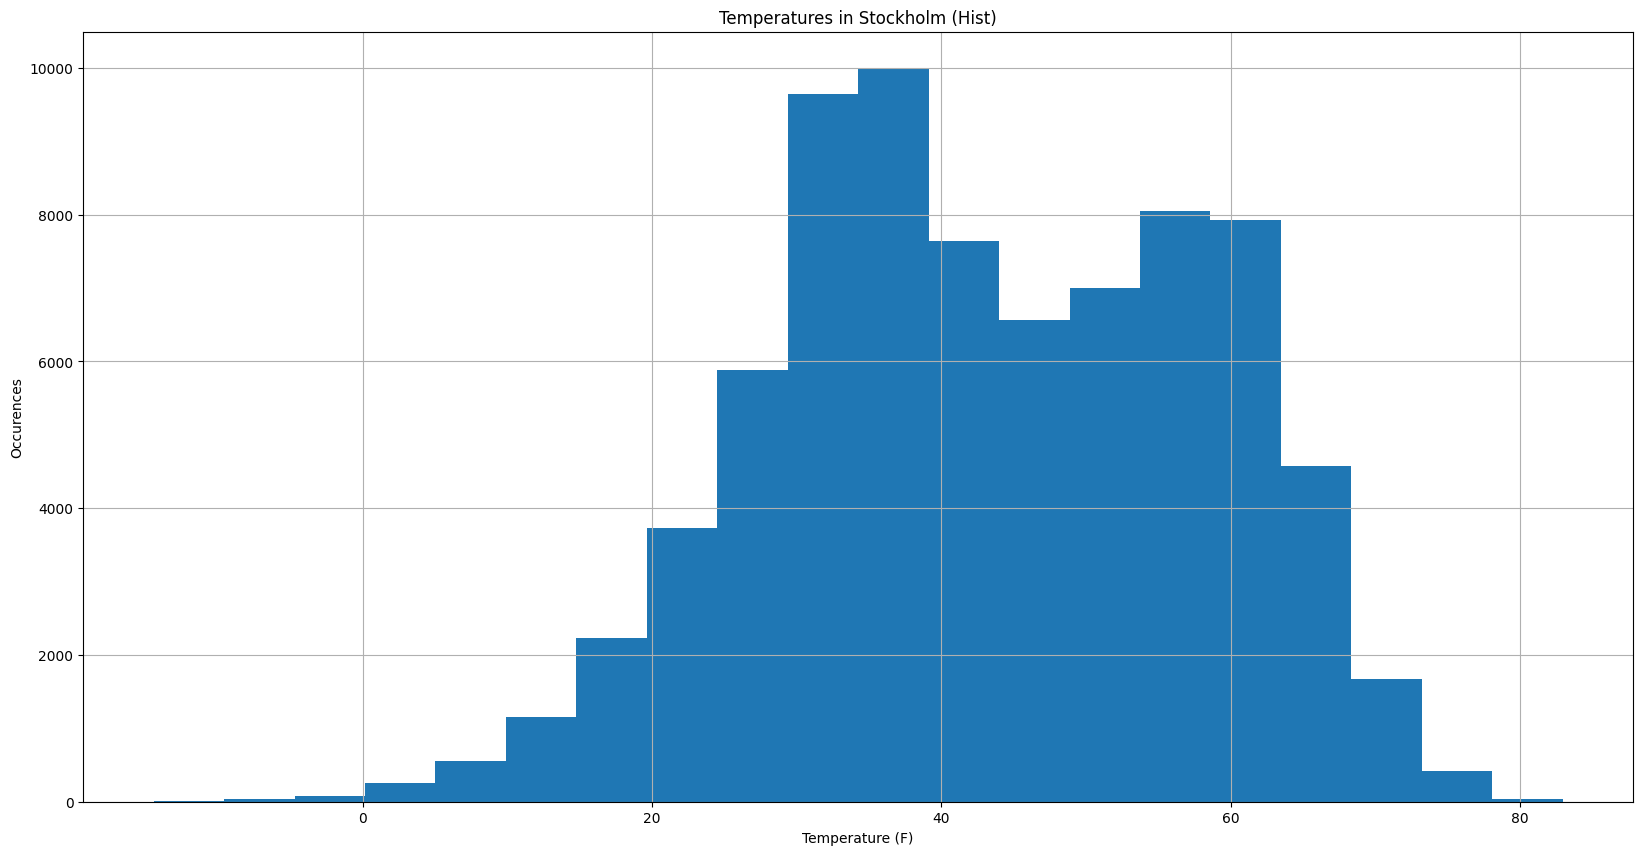

In [7]:
# Problem 3: Stockholm dataset
# Generate 4 functions

import numpy as np
import matplotlib.pyplot as plt

# 1st function: Load stockholm dataset
def load_dataset(filename):
    data = np.loadtxt(filename)
    return data

# 2nd function: Convert temps from C to F
def c_to_f(c_temp):
    return (c_temp * 9/5) + 32

# 3rd function: Generate plot graph
def temp_plot(data):
    dates = data[:, 0] + (data[:, 1] - 1) / 12.0 + (data[:, 2] - 1) / 365.0
    temps_c = data[:, 3]
    temps_f = c_to_f(temps_c)

    print("\n")
    plt.figure(figsize=(20, 10))
    plt.plot(dates, temps_f, label = 'Morning Temperature (F)')
    plt.title('Temperatures in Stockholm (Plot)')
    plt.xlabel('Time (Years)')
    plt.ylabel('Temperature (F)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4th function: Generate histogram
def temp_hist(data):
    temps_c = data[:, 3]
    temps_f = c_to_f(temps_c)

    print("\n")
    plt.figure(figsize=(20, 10))
    plt.hist(temps_f, bins=20)
    plt.title('Temperatures in Stockholm (Hist)')
    plt.xlabel('Temperature (F)')
    plt.ylabel('Occurences')
    plt.grid(True)
    plt.show()

# Define dataset, call all functions
file_path = 'stockholm_td_adj.dat'
temp_data = load_dataset(file_path)
temp_plot(temp_data)
temp_hist(temp_data)


In [12]:
# Problem 4: Twitter

def id_hash(file_name, count):
    # Count instances of hashtags
    hash_counter = {}

    with open(file_name) as file:
        for i in file:
            # Break text file down into a list
            word_break = i.strip().split()

            for j in word_break:
                if j.startswith('#'):
                    # When words start with '#', increment counter
                    hash_counter[j] = hash_counter.get(j, 0) + 1

    # Sort hash counter in decending order
    sort_hash = sorted(hash_counter.items(), key=lambda x: x[1], reverse=True) [: count]

    # Create new txt file, write data from 'sort_hash' into it
    with open('sorted_hashtags.txt', 'w') as output_file:
        for i, j in sort_hash:
            output_file.write("{}, with count: {}\n".format(i, j))

# Call 'id_hash' and define no. of hashtags to track
id_hash('twitter_data.txt', 5)

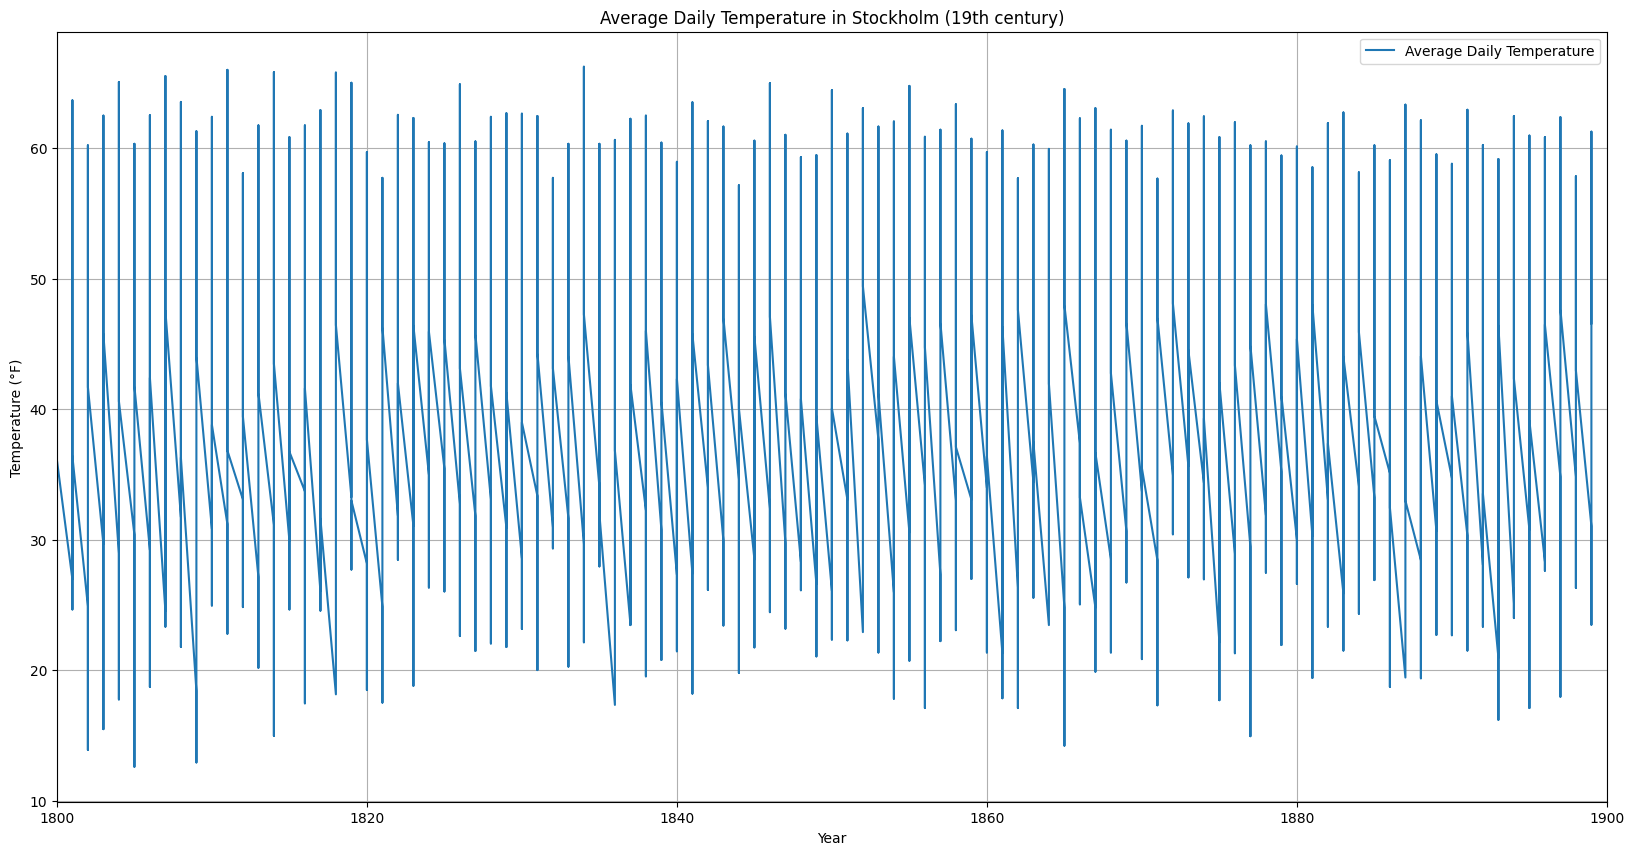

In [13]:
# Problem 5: Stockholm part 2

import numpy as np
import matplotlib.pyplot as plt

# 1st function: Load stockholm dataset
def load_dataset(filename):
    data = np.loadtxt(filename)
    return data

# 2nd function: Convert temps from C to F
def c_to_f(c_temp):
    return (c_temp * 9/5) + 32

def temp_plot(data):
    # Extract year and temp columns
    years = temp_data[:, 0]
    temperatures = temp_data[:, 1:]

    # Calculate average daily temperature in Fahrenheit
    avg_temp_c = np.mean(temperatures, axis=1)
    avg_temp_f = c_to_f(avg_temp_c)

    # Limit data to 19th century
    endpoints = (years >= 1800) & (years < 1900)
    year_count = years[endpoints]
    temp_count = avg_temp_f[endpoints]

    plt.figure(figsize=(20, 10))
    plt.plot(year_count, temp_count, label='Average Daily Temperature')
    plt.xlim(1800, 1900)
    plt.title('Average Daily Temperature in Stockholm (19th century)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°F)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define dataset, call all functions
file_path = 'stockholm_td_adj.dat'
temp_data = load_dataset(file_path)
temp_plot(temp_data)

In [9]:
# Problem 6: Longest word

# Find longest word in a given file
def finder(file_name):
    # Store
    temp_word = ""
    with open(file_name, 'r') as file:
        for line in file:
            words = line.split()
            for i in words:
                if len(i) > len(temp_word):
                    temp_word = i
    return temp_word

# Define files to cycle through
all_files = ["tomsawyer.txt", "a-princess-of-mars.txt", "great_expectations.txt", "lorem-ipsum.txt", "moby-dick.txt"]

# STore all longest words in one list
all_words = []
# Dictionary to store the longest word from each file, along with file name
word_dictionary = {}

# Iterate through each file and find the longest word, store in word_dictionary
for j in all_files:
    longest_word = finder(j)
    all_words.append(longest_word)
    word_dictionary[longest_word] = j

# Edit longest word to take max length word only
longest_word = max(all_words, key=len)

# Print longest word, its length, and origin file
print("Longest word across all files: '{}', with a length of {}, from file: {}".format(longest_word, len(longest_word), word_dictionary[longest_word]))


Longest word across all files: 'https://www.gutenberg.org/2/7/0/2701/', with a length of 37, from file: moby-dick.txt
